In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=05de508e5d0c791928ec9409e3443a3cc3f0516f99af1072d1d0cc17750c4670
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import glob
import torch
import torchvision
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
import json
import pandas as pd
import copy
import random
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

In [ ]:
def extract_frames(path):
    """
    Generator to extract frames from the video.
    """
    vidObj = cv2.VideoCapture(path)
    success = True
    while success:
        success, image = vidObj.read()
        if success:
            yield image

In [ ]:
def validate_video(path, train_data_transforms):
    """
    Validate if the video is corrupted by attempting to extract and transform frames.
    """
    transform = train_data_transforms
    count = 20
    frames = []
    frame_interval = int(100 / count)
    first_frame = np.random.randint(0, frame_interval)

    for i, frame in enumerate(extract_frames(path)):
        frames.append(transform(frame))
        if len(frames) == count:
            break

    if len(frames) < count:
        raise ValueError(f"Not enough frames in video {path}")

    frames = torch.stack(frames)
    frames = frames[:count]
    return frames

In [ ]:
def process_video_files():
    image_size = 112
    normalization_mean = [0.485, 0.456, 0.406]
    normalization_std = [0.229, 0.224, 0.225]

    preprocessing_pipeline = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(normalization_mean, normalization_std)
    ])

    video_file_paths = []
    video_directories = [
        '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/*.mp4',
        '/content/drive/MyDrive/data here/DFDC_REAL_Face_only_data/*.mp4',
    ]

    for directory in video_directories:
        video_file_paths.extend(glob.glob(directory))

    print("Total number of videos:", len(video_file_paths))
    print(video_file_paths)

    processed_count = 0
    for index, video_file in enumerate(video_file_paths):
        try:
            validate_video(video_file, preprocessing_pipeline)
            processed_count += 1
        except Exception as error:
            remaining_videos = len(video_file_paths) - processed_count
            print(f"Videos processed: {processed_count}, Remaining: {remaining_videos}")
            print(f"Corrupted video: {video_file}, Error: {error}")
            os.remove(video_file)

    print(f"Total corrupted videos removed: {len(video_file_paths) - processed_count}")

if __name__ == "__main__":
    process_video_files()

Total number of videos: 3293
['/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/adckadazdl.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/dfejiindbl.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/bwrtykzswp.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/crcrqrsyik.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/aysxspqqdm.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/cktnvixgub.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/dnrojrvdrw.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/edmrdlwfbp.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/bsijbywcuc.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/asweglrfni.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/dknttybmxm.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/dbpwyvzccc.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data

In [ ]:
#to load preprocessod video to memory

def get_video_files(directory):
    """
    Retrieve and shuffle video files from a specified directory.
    """
    video_files = glob.glob(f'{directory}/*.mp4')
    num_shuffles = 4

    for _ in range(num_shuffles):
        random.shuffle(video_files)

    return video_files

In [ ]:
def filter_videos_by_frame_count(directory, min_frame_count=100):
    """
    Filter out videos with fewer than the specified minimum frame count.
    """
    valid_videos = []
    frame_counts = []

    for video_file in directory:
        cap = cv2.VideoCapture(video_file)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        if frame_count >= min_frame_count:
            valid_videos.append(video_file)
            frame_counts.append(frame_count)
        else:
            print(f"Skipping video {video_file}: insufficient frames ({frame_count})")

    return valid_videos, frame_counts

In [ ]:
def main():
    directory = [
        '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/*.mp4',
        '/content/drive/MyDrive/data here/DFDC_REAL_Face_only_data/*.mp4',
    ]
    min_frame_count = 100

    video_files = get_video_files(directory)
    print(video_files)
    valid_videos, frame_counts = filter_videos_by_frame_count(video_files, min_frame_count)

    print("Frames per video:", frame_counts)
    print("Total number of valid videos:", len(valid_videos))
    print('Average frames per video:', np.mean(frame_counts))

['/content/drive/MyDrive/data here/DFDC_REAL_Face_only_data/hdckzcdbxi.mp4', '/content/drive/MyDrive/data here/DFDC_REAL_Face_only_data/oeibgzoqus.mp4', '/content/drive/MyDrive/data here/DFDC_REAL_Face_only_data/hvyevrpeyc.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/clggcywupp.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/abiodyryai.mp4', '/content/drive/MyDrive/data here/DFDC_REAL_Face_only_data/iarobzzslu.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/bvienyqobe.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/bwmnobzril.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/bittxslmgp.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/asweglrfni.mp4', '/content/drive/MyDrive/data here/DFDC_REAL_Face_only_data/xncqpmoabm.mp4', '/content/drive/MyDrive/data here/DFDC_REAL_Face_only_data/kvqhkpkbwd.mp4', '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/bjhlloopdo.mp4', '/content/d

In [ ]:
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Custom dataset class for video processing
class VideoDataset(Dataset):
    def __init__(self, video_paths, labels_df, sequence_length=60, transform=None):
        """
        Initializes the dataset with video paths, labels, sequence length, and transform.

        Args:
            video_paths (list): List of video file paths.
            labels_df (pd.DataFrame): DataFrame containing video filenames and their corresponding labels.
            sequence_length (int): Number of frames to be extracted from each video.
            transform (callable, optional): A function/transform to apply to each frame.
        """
        self.video_paths = video_paths
        self.labels_df = labels_df
        self.sequence_length = sequence_length
        self.transform = transform

    def __len__(self):
        """
        Returns the total number of videos.
        """
        return len(self.video_paths)

    def __getitem__(self, index):
        """
        Retrieves and processes the video at the specified index.

        Args:
            index (int): Index of the video to be fetched.

        Returns:
            torch.Tensor: Tensor containing the video frames.
            int: Label of the video (0 for FAKE, 1 for REAL).
        """
        video_file = self.video_paths[index]
        frames = []
        sample_interval = int(100 / self.sequence_length)
        start_frame = np.random.randint(0, sample_interval)

        video_filename = os.path.basename(video_file)
        label = self.get_label(video_filename)

        # Extract and transform frames
        for i, frame in enumerate(self.extract_frames(video_file)):
            if i >= start_frame and i % sample_interval == 0:
                if self.transform:
                    frame = self.transform(frame)
                frames.append(frame)
            if len(frames) >= self.sequence_length:
                break

        frames_tensor = torch.stack(frames)[:self.sequence_length]
        return frames_tensor, label

    def get_label(self, video_filename):
        """
        Retrieves the label for a given video file.

        Args:
            video_filename (str): Filename of the video.

        Returns:
            int: Label of the video (0 for FAKE, 1 for REAL).
        """
        label_row = self.labels_df[self.labels_df["file"] == video_filename]
        if label_row.empty:
            raise ValueError(f"No label found for video file {video_filename}")

        label_str = label_row.iloc[0, 1]
        return 0 if label_str == 'FAKE' else 1

    def extract_frames(self, video_file):
        """
        Generator function to extract frames from a video file.

        Args:
            video_file (str): Path to the video file.

        Yields:
            np.ndarray: The next frame from the video.
        """
        capture = cv2.VideoCapture(video_file)
        success, image = capture.read()
        while success:
            yield image
            success, image = capture.read()

# Function to plot image tensor
def plot_image_tensor(tensor):
    """
    Plots a tensor image using matplotlib.

    Args:
        tensor (torch.Tensor): The image tensor to be plotted.
    """
    image = tensor.cpu().numpy().transpose(1, 2, 0)
    b, g, r = cv2.split(image)
    image = cv2.merge((r, g, b))
    image = image * [0.22803, 0.22145, 0.216989] + [0.43216, 0.394666, 0.37645]
    image = np.clip(image * 255.0, 0, 255).astype(np.uint8)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [ ]:
def count_real_and_fake_videos(video_paths):
    # Load metadata
    metadata = pd.read_csv('/content/drive/MyDrive/data here/datadfdc.csv', names=["file", "label"])

    # Initialize counters
    real_count = 0
    fake_count = 0

    # Iterate through the video paths
    for path in video_paths:
        video_name = path.split('/')[-1]

        # Find the label for the current video
        label = metadata.loc[metadata["file"] == video_name, "label"].values[0]

        # Count the videos based on their labels
        if label == 'FAKE':
            fake_count += 1
        elif label == 'REAL':
            real_count += 1

    return real_count, fake_count

train :  2617
test :  655


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


TRAIN:  Real: 1372  Fake: 1245
TEST:  Real: 349  Fake: 306


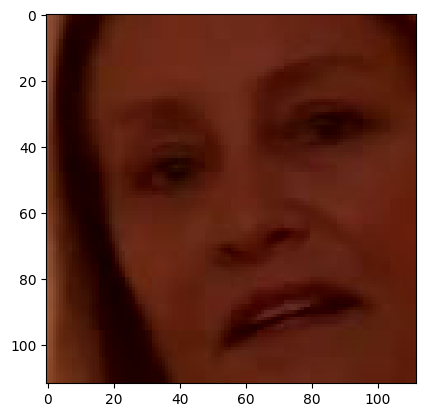

In [ ]:
# load the labels and video in data loader
directory = [
        '/content/drive/MyDrive/data here/DFDC_FAKE_Face_only_data/*.mp4',
        '/content/drive/MyDrive/data here/DFDC_REAL_Face_only_data/*.mp4',
    ]

#video_files = get_video_files(directory)
header_list = ["file","label"]
labels = pd.read_csv('/content/drive/MyDrive/data here/datadfdc.csv', names=header_list)

# Split dataset
random.shuffle(directory)

training_videos = directory[:int(0.8 * len(directory))]
valid_videos = directory[int(0.8 * len(directory)):]

print("train : ", len(training_videos))
print("test : ", len(valid_videos))

train_real_fake = count_real_and_fake_videos(training_videos)
test_real_fake = count_real_and_fake_videos(valid_videos)

print("TRAIN: ", "Real:", train_real_fake[0], " Fake:", train_real_fake[1])
print("TEST: ", "Real:", test_real_fake[0], " Fake:", test_real_fake[1])

size_of_image = 112

mean_values = [0.485, 0.456, 0.406]
std_values = [0.229, 0.224, 0.225]

# Transformation for training dataset

train_data_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((size_of_image, size_of_image)),
    transforms.ToTensor(),
    transforms.Normalize(mean_values, std_values)
])

train_data = VideoDataset(training_videos, labels, sequence_length=10, transform=train_data_transforms)
val_data = VideoDataset(valid_videos, labels, sequence_length=10, transform=train_data_transforms)

train_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=4)
valid_loader = DataLoader(val_data, batch_size=4, shuffle=True, num_workers=4)

image, label = train_data[0]
plot_image_tensor(image[0, :, :, :])

In [ ]:
#Model feature extraction and LSTM
import torch.nn as nn
from torchvision import models

class ConvLSTMNet(nn.Module):
    def __init__(self, num_classes, feature_dim=2048, lstm_layers=1, hidden_size=2048, bidirectional=False):
        super(ConvLSTMNet, self).__init__()
        # Load a pre-trained ResNeXt50 model and remove the last two layers
        resnext = models.resnext50_32x4d(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(resnext.children())[:-2])

        # LSTM layer for sequence modeling
        self.lstm = nn.LSTM(input_size=feature_dim, hidden_size=hidden_size, num_layers=lstm_layers,
                            bidirectional=bidirectional, batch_first=True)

        # Fully connected layer for classification
        self.classifier = nn.Linear(hidden_size, num_classes)

        # Adaptive average pooling and other layers
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        batch_size, seq_len, channels, height, width = x.size()

        # Reshape input for CNN
        x = x.view(batch_size * seq_len, channels, height, width)

        # Pass through feature extractor
        x = self.feature_extractor(x)

        # Global average pooling
        x = self.global_pool(x)
        x = x.view(batch_size, seq_len, -1)

        # Pass through LSTM
        x, _ = self.lstm(x)

        # Apply dropout, activation, and fully connected layer
        x = self.classifier(self.dropout(self.activation(x[:, -1, :])))

        return x


In [ ]:
# Define the model and move it to the GPU
model = ConvLSTMNet(2).cuda()

# Create an empty numpy array with the shape (1, 20, 3, 112, 112)
input_data = np.empty((1, 20, 3, 112, 112))

# Convert the numpy array to a PyTorch tensor and move it to the GPU
input_tensor = torch.from_numpy(input_data).type(torch.cuda.FloatTensor)

# Pass the tensor through the model and get the outputs
a, b = model(input_tensor)

In [ ]:

# class TemporalConvBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size=3, dilation=1, padding=1):
#         super(TemporalConvBlock, self).__init__()
#         self.first_conv = nn.Conv1d(in_channels, out_channels, kernel_size, padding=padding, dilation=dilation)
#         self.second_conv = nn.Conv1d(out_channels, out_channels, kernel_size, padding=padding, dilation=dilation)
#         self.activation = nn.ReLU()
#         self.match_dimensions = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else None

#     def forward(self, x):
#         residual = x if self.match_dimensions is None else self.match_dimensions(x)
#         x = self.activation(self.first_conv(x))
#         x = self.second_conv(x)
#         return self.activation(x + residual)


In [ ]:
# model = TCNModel(2).cuda()
# a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

In [ ]:


# class CNNModel(nn.Module):
#     def __init__(self, num_classes):
#         super(CNNModel, self).__init__()

#         # Load pretrained ResNeXt-50 model
#         model = models.resnext50_32x4d(pretrained=True)

#         # Remove the last two layers (average pooling and fully connected layer)
#         self.model = nn.Sequential(*list(model.children())[:-2])

#         # Adaptive average pooling to reduce spatial dimensions to 1x1
#         self.avgpool = nn.AdaptiveAvgPool2d(1)

#         # Dropout layer for regularization
#         self.dp = nn.Dropout(0.4)

#         # Fully connected layer for classification
#         self.linear1 = nn.Linear(2048, num_classes)

#     def forward(self, x):
#         # Extract dimensions from input tensor
#         batch_size, seq_length, c, h, w = x.shape

#         # Reshape input tensor for batch processing
#         x = x.view(batch_size * seq_length, c, h, w)

#         # Pass through the pretrained ResNeXt-50 model
#         fmap = self.model(x)

#         # Apply adaptive average pooling
#         x = self.avgpool(fmap)

#         # Reshape back to sequence length dimension
#         x = x.view(batch_size, seq_length, 2048)

#         # Apply dropout and then the fully connected layer
#         x = self.dp(x)
#         x = torch.mean(x, dim=1)  # Average pooling across the sequence length
#         x = self.linear1(x)

#         # Return feature map (fmap) and final classification output
#         return fmap, x


In [ ]:

# from torchvision import models

# class ModelWithInceptionV3(nn.Module):
#     def __init__(self, num_classes, latent_dim=2048, lstm_layers=1, hidden_dim=2048, bidirectional=False):
#         super(ModelWithInceptionV3, self).__init__()
#         # Initialize InceptionV3 with the default aux_logits=True
#         self.inception = models.inception_v3(pretrained=True)
#         # Adjust the Inception model by removing the final fully connected layer and auxiliary classifier
#         self.inception.fc = nn.Identity()
#         self.inception.aux_logits = False

#         self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional=bidirectional)
#         self.fc = nn.Linear(hidden_dim * (2 if bidirectional else 1), num_classes)

#     def forward(self, x):
#         batch_size, seq_length, c, h, w = x.shape
#         x = x.view(batch_size * seq_length, c, h, w)

#         # Process input through InceptionV3 to extract features
#         # Assuming self.inception is your modified InceptionV3 model
#         features = self.inception(x)  # This outputs features of shape [batch_size * seq_length, 2048, 1, 1]

#         # Flatten features for each frame
#         features = features.view(batch_size * seq_length, -1)  # Now shape [batch_size * seq_length, 2048]

#         # Reshape to [batch_size, seq_length, 2048] for LSTM processing
#         features = features.view(batch_size, seq_length, -1)

#         # Process sequence of features with LSTM
#         lstm_out, _ = self.lstm(features)
#         processed_output = self.fc(lstm_out[:, -1, :])

#         return features, processed_output


In [ ]:
import sys

def training_epoches(current_epoch, total_epochs, train_loader, model, criterions, adam_optimizer):
    """
    Trains the model for one epoch.

    Args:
    - current_epoch (int): Current epoch number.
    - total_epochs (int): Total number of epochs to train.
    - train_loader (DataLoader): DataLoader for training data.
    - model (nn.Module): The neural network model.
    - criterions (torch.nn): Loss function.
    - optimizer (torch.optim): Optimizer for training.

    Returns:
    - tuple: Average loss and accuracy for the epoch.
    """
    model.train()  # Set the model to training mode
    losses = AverageMeter()  # Utility to compute average losses
    accuracies = AverageMeter()  # Utility to compute average accuracies

    for i, (inputs, targets) in enumerate(train_loader):
        # Move data to GPU if available
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()

        # Forward pass
        _, outputs = model(inputs)
        loss = criterions(outputs, targets.type(torch.cuda.LongTensor))

        # Calculate accuracy
        acc = evaluate_model_accuracy(outputs, targets.type(torch.cuda.LongTensor))

        # Update average meters
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))

        # Backward pass and optimize
        adam_optimizer.zero_grad()
        loss.backward()
        adam_optimizer.step()

        # Print progress
        sys.stdout.write(
            "\r[Epoch {}/{}] [Batch {}/{}] [Loss: {:.4f}, Acc: {:.2f}%]".format(
                current_epoch, total_epochs, i + 1, len(train_loader), losses.avg, accuracies.avg
            )
        )

    # Save model checkpoint
    torch.save(model.state_dict(), '/content/checkpoint.pt')

    return losses.avg, accuracies.avg

def test(current_epoch, model, valid_loader, criterions):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    true = []
    pred = []

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    with torch.no_grad():
        for i, (inputs, targets) in enumerate(valid_loader):
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model(inputs)
            loss = criterions(outputs, targets)
            acc = evaluate_model_accuracy(outputs, targets)

            _, predicted = torch.max(outputs, 1)

            true.extend(targets.detach().cpu().numpy().tolist())
            pred.extend(predicted.detach().cpu().numpy().tolist())

            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))

            sys.stdout.write(
                "\r[Batch %d/%d] [Loss: %.4f, Acc: %.2f%%]"
                % (i + 1, len(valid_loader), losses.avg, accuracies.avg)
            )

        print('\nAccuracy: {:.2f}%'.format(accuracies.avg))

    return true, pred, losses.avg, accuracies.avg


class AverageMeter:
    """
    Computes and stores the average and current value.
    """

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def evaluate_model_accuracy(outputs, targets):
    """
    Calculates the accuracy of predictions.

    Args:
    - outputs (Tensor): Model predictions.
    - targets (Tensor): True labels.

    Returns:
    - float: Accuracy percentage.
    """
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == targets).sum().item()
    accuracy = correct / targets.size(0) * 100.0
    return accuracy


In [ ]:
def plot_metric(train_metric, val_metric, metric_name, num_epochs, ylabel):
    epochs = range(1, num_epochs + 1)
    plt.plot(epochs, train_metric, 'g', label='Training ' + metric_name)
    plt.plot(epochs, val_metric, 'b', label='Validation ' + metric_name)
    plt.title('Training and Validation ' + ylabel)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

def plot_loss(train_loss, val_loss, num_epochs):
    plot_metric(train_loss, val_loss, 'loss', num_epochs, 'Loss')

def plot_accuracy(train_acc, val_acc, num_epochs):
    plot_metric(train_acc, val_acc, 'accuracy', num_epochs, 'Accuracy')

def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix:')
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')

    df_cm = pd.DataFrame(cm, index=['Fake', 'Real'], columns=['Fake', 'Real'])
    plt.figure(figsize=(6, 4))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.ylabel('Actual label', size=14)
    plt.xlabel('Predicted label', size=14)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size=12)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size=12)
    plt.title('Confusion Matrix')
    plt.show()

    calculated_acc = (cm[0][0] + cm[1][1]) / np.sum(cm)
    print(f"Calculated Accuracy: {calculated_acc * 100:.2f}%")

[Epoch 1/20] [Batch 655/655] [Loss: 0.3937, Acc: 86.09%]Testing
[Batch 164/164] [Loss: 0.2966, Acc: 87.02%]
Accuracy 87.02290076335878
[Epoch 2/20] [Batch 655/655] [Loss: 0.3784, Acc: 88.15%]Testing
[Batch 164/164] [Loss: 0.2544, Acc: 89.62%]
Accuracy 89.61832061068702
[Epoch 3/20] [Batch 655/655] [Loss: 0.3775, Acc: 87.81%]Testing
[Batch 164/164] [Loss: 0.2558, Acc: 88.70%]
Accuracy 88.70229007633588
[Epoch 4/20] [Batch 655/655] [Loss: 0.3245, Acc: 90.26%]Testing
[Batch 164/164] [Loss: 0.2663, Acc: 89.92%]
Accuracy 89.92366412213741
[Epoch 5/20] [Batch 655/655] [Loss: 0.2925, Acc: 91.90%]Testing
[Batch 164/164] [Loss: 0.3667, Acc: 86.87%]
Accuracy 86.87022900763358
[Epoch 6/20] [Batch 655/655] [Loss: 0.2783, Acc: 92.47%]Testing
[Batch 164/164] [Loss: 0.2895, Acc: 88.55%]
Accuracy 88.54961832061069
[Epoch 7/20] [Batch 655/655] [Loss: 0.2725, Acc: 92.82%]Testing
[Batch 164/164] [Loss: 0.3062, Acc: 87.33%]
Accuracy 87.32824427480917
[Epoch 8/20] [Batch 655/655] [Loss: 0.2468, Acc: 94.80%

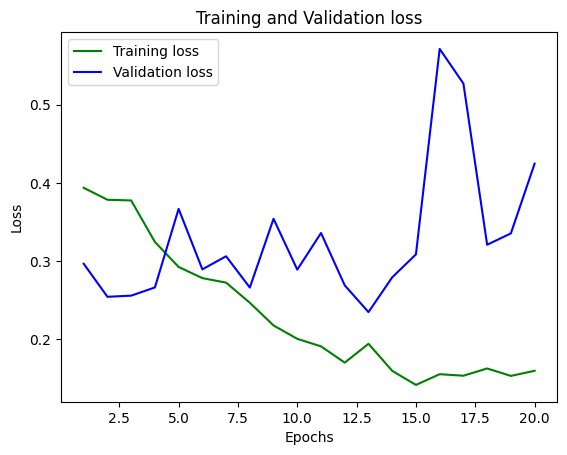

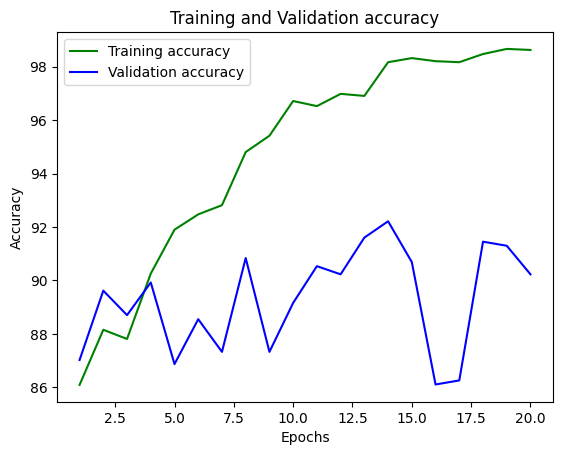

[[267  50]
 [ 14 324]]
True positive =  267
False positive =  50
False negative =  14
True negative =  324




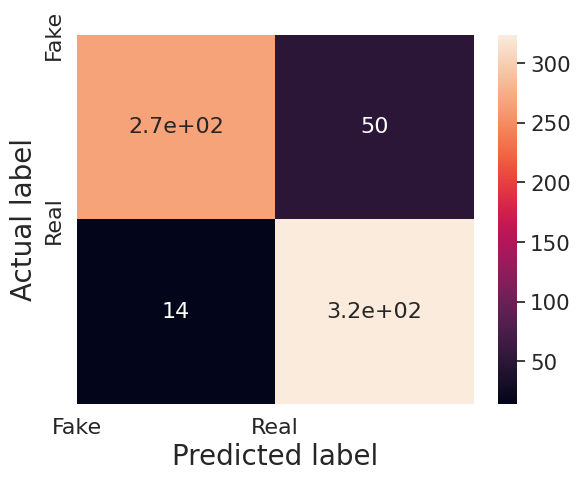

Calculated Accuracy 90.22900763358778


In [ ]:
from sklearn.metrics import confusion_matrix

# Define the learning rate
learning_rate = 1e-5

# Set the total number of epochs for training
total_epochs = 20

# Initialize the Adam optimizer with model parameters, learning rate, and weight decay
adam_optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 1e-5)

criterions = nn.CrossEntropyLoss().cuda()

avg_train_loss = []
train_accuracy = []
test_loss_avg = []
test_accuracy = []

for current_epoch in range(1, total_epochs + 1):
    epoch_train_loss, epoch_train_accuracy = training_epoches(current_epoch, total_epochs, train_loader, model, criterions, adam_optimizer)
    avg_train_loss.append(epoch_train_loss)
    train_accuracy.append(epoch_train_accuracy)
    true, pred, test_l, test_acc = test(current_epoch, model, valid_loader, criterions)
    test_loss_avg.append(test_l)
    test_accuracy.append(test_acc)

plot_loss(avg_train_loss, test_loss_avg, len(avg_train_loss))
plot_accuracy(train_accuracy, test_accuracy, len(train_accuracy))

conf_mat = confusion_matrix(true, pred)
print(conf_mat)
print_confusion_matrix(true, pred)